# Table of Contents

- [Data Loading](#data-loading)
- [Data PreProcessing](#data-preprocessing)
- [Clean & Normalizing Text](#clean--normalizing-text)
- [Keyword Extraction](#keyword-extraction)
- [Feature Extraction](#feature-extraction)
- [EDA](#eda)
- [Likes by Brand](#likes-by-brand)
- [Count of Comments by Brand](#count-of-comments-by-brand)
- [Count of comments by Product](#count-of-comments-by-product)
- [Engagement Metrics Comparison by Brand](#engagement-metrics-comparison-by-brand)
- [User Engagement Analysis](#user-engagement-analysis)
- [Feature Importance Ranking](#feature-importance-ranking)
- [Word Cloud for Comments and Top Keywords](#word-cloud-for-comments-and-top-keywords)
- [Word Frequency Analysis](#word-frequency-analysis)
- [N-gram Analysis](#n-gram-analysis)
- [Topic Modeling](#topic-modeling)
- [Sentiment Analysis](#sentiment-analysis)
- [Predicted Sentiment Labels of Comments using Machine Learning (SVM): A Text Classification Approach](#predicted-sentiment-labels-of-comments-using-machine-learning-svm-a-text-classification-approach)
- [Revised version to improve the performance of Negative Sentiment class](#revised-version-to-improve-the-performance-of-negative-sentiment-class)
- [Comparisons of the predictions of set 1 vs set 2 - Analysis](#comparisons-of-the-predictions-of-set-1-vs-set-2---analysis)
- [Classify comments or descriptions into categories based on topics or theme](#classify-comments-or-descriptions-into-categories-based-on-topics-or-theme)
- [Feature Importance Ranking for Smartphones](#feature-importance-ranking-for-smartphones)
- [Text Summarization](#text-summarization)
- [Recommendation System](#recommendation-system)


# Data Loading  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import re
from bs4 import BeautifulSoup
import emoji
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize


In [2]:
# Excel file is named 'iphone_data.xlsx'
data = pd.read_excel('Smartphone_data.xlsx')

# Set pandas display options to show more characters in each cell
pd.set_option('display.max_colwidth', None)

data.tail(20)

Brand         Product  \
23398  Sony  Sony Xperia 5V   
23399  Sony  Sony Xperia 5V   
23400  Sony  Sony Xperia 5V   
23401  Sony  Sony Xperia 5V   
23402  Sony  Sony Xperia 5V   
23403  Sony  Sony Xperia 5V   
23404  Sony  Sony Xperia 5V   
23405  Sony  Sony Xperia 5V   
23406  Sony  Sony Xperia 5V   
23407  Sony  Sony Xperia 5V   
23408  Sony  Sony Xperia 5V   
23409  Sony  Sony Xperia 5V   
23410  Sony  Sony Xperia 5V   
23411  Sony  Sony Xperia 5V   
23412  Sony  Sony Xperia 5V   
23413  Sony  Sony Xperia 5V   
23414  Sony  Sony Xperia 5V   
23415  Sony  Sony Xperia 5V   
23416  Sony  Sony Xperia 5V   
23417  Sony  Sony Xperia 5V   

                                                                                                                                                                                                                                                                                                                                                                                          Comment Text  \
23398                                                                                                                                                                                                                                                                                                                                                   You better use a Sony Camera ... it will zoom.   
23399  You are lying. I bought this phone looking at the videos like that and that is NOT what you get. 10% of videos are gone because there is some random error. About 30% of videos have random freezes in the video. Then 20% of the videos have audio and video out of sync. Then 5% of videos get blackness when you zoom in or out. Complete shit product, buy something else, anything really!   
23400                                                                                                                                                                                                                                                                                                                                                                  Which STAR WARS series is that?   
23401                                                                                                                                                                                                                                                                                                                                                                            no telephoto lens meh   
23402                                                                                                                                                                       I've owned many Xperia phones and I am watching this with My Xperia V. They all overheat, slowdown and camera shuts down prematurely. I think I'm going Pixel 8 pro this time. Thanks for the awesome reviews, I'm a fan 😊   
23403                                                                                                                                                                                                                                                                                                                                                                    the side bezels lmao so thicc   
23404                                                                                                                                                                                                                                                                                                                                                                 you can get a 256gb one of these   
23405                                                                                                                                                                                                     

# Data PreProcessing 

In [3]:
## Display the total number of records in the dataframe
len(data)

23418

In [4]:
# present the summary statistics of the dataset 
print(data.describe)

<bound method NDFrame.describe of         Brand         Product  \
0      iphone       iphone 15   
1      iphone       iphone 15   
2      iphone       iphone 15   
3      iphone       iphone 15   
4      iphone       iphone 15   
...       ...             ...   
23413    Sony  Sony Xperia 5V   
23414    Sony  Sony Xperia 5V   
23415    Sony  Sony Xperia 5V   
23416    Sony  Sony Xperia 5V   
23417    Sony  Sony Xperia 5V   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [5]:
# display data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23418 entries, 0 to 23417
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              23418 non-null  object
 1   Product            23418 non-null  object
 2   Comment Text       23415 non-null  object
 3   Username           23418 non-null  object
 4   Timestamp          23418 non-null  object
 5   Likes              23418 non-null  int64 
 6   Dislikes           23418 non-null  int64 
 7   User Engagement    23418 non-null  int64 
 8   Video Title        23418 non-null  object
 9   Video URL          23418 non-null  object
 10  Video Description  23418 non-null  object
 11  Comment ID         23418 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 2.1+ MB
None


In [6]:
print(data.dtypes)

Brand                object
Product              object
Comment Text         object
Username             object
Timestamp            object
Likes                 int64
Dislikes              int64
User Engagement       int64
Video Title          object
Video URL            object
Video Description    object
Comment ID            int64
dtype: object


In [7]:
#No of missing values in each column
data.isnull().sum()

Brand                0
Product              0
Comment Text         3
Username             0
Timestamp            0
Likes                0
Dislikes             0
User Engagement      0
Video Title          0
Video URL            0
Video Description    0
Comment ID           0
dtype: int64

In [8]:
# Fill missing values in 'Comment Text' column with 'No comments'
data['Comment Text'].fillna('No comments', inplace=True)

#No of missing values in each column
data.isnull().sum()


Brand                0
Product              0
Comment Text         0
Username             0
Timestamp            0
Likes                0
Dislikes             0
User Engagement      0
Video Title          0
Video URL            0
Video Description    0
Comment ID           0
dtype: int64

## Clean & Normalizing Text

In [9]:

# Function to clean and normalize text
def clean_text(text):
    # Remove special characters, emojis, and unnecessary symbols
    text = re.sub(r'[^\w\s]', '', str(text))
    # Remove emojis
    text = emoji.demojize(text)
    # Eliminate URLs or hyperlinks
    text = re.sub(r'http\S+', '', text)
    # Normalize text (convert to lowercase)
    text = text.lower()
    return text

# Function to clean and standardize usernames
def clean_username(username):
    # Remove special characters and leading/trailing spaces
    username = re.sub(r'[^\w\s]', '', str(username))
    # Standardize username (convert to lowercase)
    username = username.lower().strip()
    return username

# Function to process timestamp column
#def process_timestamp(df):
#    if 'Timestamp' in df.columns:
        # Convert 'Timestamp' column to datetime format
#        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        
        # Extract date from the 'Timestamp' column
#        df['Date'] = df['Timestamp'].dt.date
        
        # Drop the original 'Timestamp' column
#        df = df.drop(columns=['Timestamp'])
    
#    return df


def process_timestamp(df):
    if 'Timestamp' in df.columns:
        # Convert 'Timestamp' column to datetime format
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        
        # Extract date from the 'Timestamp' column
        df['Date'] = df['Timestamp'].dt.date
        
        # Extract time from the 'Timestamp' column
        df['Time'] = df['Timestamp'].dt.time
        
        # Combine 'Date' and 'Time' into a single 'Timestamp' column
        df['Timestamp'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        
        # Drop the 'Date' and 'Time' columns
        df = df.drop(columns=['Date', 'Time'])
    
    return df

# Function to clean and extract relevant information from video description
def clean_and_extract_description(description):
    # Remove HTML tags
    description = BeautifulSoup(description, 'html.parser').get_text()
    
    # Remove unwanted formatting
    description = re.sub(r'\n', ' ', description)
    
    # Remove emojis
    description = emoji.demojize(description)
    
    # Eliminate URLs or hyperlinks
    description = re.sub(r'http\S+', '', description)
    
    # Normalize text (convert to lowercase)
    description = description.lower()
    
    return description

# Function to handle missing values in 'Comment Text' column
def handle_missing_comments(df):
    if 'Comment Text' in df.columns:
        # Fill missing values in 'Comment Text' column with 'No comments'
        df['Comment Text'].fillna('No comments', inplace=True)
    
    return df

# Read the data from the Excel file
data = pd.read_excel('Smartphone_data.xlsx')

# Apply data processing functions to the DataFrame
data['Comment Text'] = data['Comment Text'].apply(clean_text)
data['Username'] = data['Username'].apply(clean_username)
data = process_timestamp(data)
data['Video Description'] = data['Video Description'].apply(clean_and_extract_description)
data = handle_missing_comments(data)
if 'Comment ID' in data.columns:
    data.drop(columns=['Comment ID'], inplace=True)

# Set pandas display options to show more characters in each cell
pd.set_option('display.max_colwidth', None)

# Display the first 20 rows of the DataFrame
print(data.head(20))


C:\Users\atiya\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


     Brand    Product  \
0   iphone  iphone 15   
1   iphone  iphone 15   
2   iphone  iphone 15   
3   iphone  iphone 15   
4   iphone  iphone 15   
5   iphone  iphone 15   
6   iphone  iphone 15   
7   iphone  iphone 15   
8   iphone  iphone 15   
9   iphone  iphone 15   
10  iphone  iphone 15   
11  iphone  iphone 15   
12  iphone  iphone 15   
13  iphone  iphone 15   
14  iphone  iphone 15   
15  iphone  iphone 15   
16  iphone  iphone 15   
17  iphone  iphone 15   
18  iphone  iphone 15   
19  iphone  iphone 15   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [10]:
print(data['Comment Text'])

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              would you rather have a 14 pro or a 15 \nfor that iphone 15 battery test\n
1        as a vfx artist and supervisor i can confirm that what you say is true the ony factor in compression is the perspective that is created by the distance to the subject if you take a widangle shot from the same distance as your portrait how could there be parallax movement between foreground and background if you didnt change your position right\n\nif you move towards something the things farther away ge

# Keyword Extraction

In [11]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK stopwords
nltk.download('stopwords')
 

# Tokenization and removal of stopwords
stop_words = set(stopwords.words('english'))
tokenizer = nltk.RegexpTokenizer(r'\w+')

def preprocess_text(text):
    tokens = tokenizer.tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

# Apply text preprocessing to the 'Comment Text' column
data['Processed Comment'] = data['Comment Text'].apply(preprocess_text)

# TF-IDF Vectorization
tfidata_vectorizer = TfidfVectorizer(max_features=2000)  # You can adjust max_features as needed
tfidata_matrix = tfidata_vectorizer.fit_transform(data['Processed Comment'])

# Get the feature names (words) from the TF-IDF model
feature_names = tfidata_vectorizer.get_feature_names_out()

# Find the top keywords based on their TF-IDF scores
top_keywords = []

for i, row in enumerate(tfidata_matrix):
    row = row.toarray().flatten()
    top_indices = row.argsort()[-5:][::-1]  # Get the indices of top 5 TF-IDF scores
    keywords = [feature_names[idx] for idx in top_indices]
    top_keywords.append(keywords)

# Add the top keywords to the DataFrame
data['Top Keywords'] = top_keywords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Feature Extraction

In [12]:
import pandas as pd
import re

# Predefined list of smartphone-related terms
smartphone_terms = [
    "camera", "battery", "performance", "screen", "display", "design", "price",
    "storage", "processor", "ram", "camera quality", "waterproof", "fast charging",
    "operating system", "UI", "user interface", "updates", "security", "privacy",
    "biometric", "fingerprint", "facial recognition", "voice assistant", "wireless charging"
    # Add more terms as needed
]

# Define a function to extract smartphone features from text
def extract_smartphone_features(text):
    features = []
    # Iterate through each predefined smartphone term
    for term in smartphone_terms:
        # Search for the term in the text (case insensitive and whole word match)
        if re.search(r'\b{}\b'.format(term), text, re.IGNORECASE):
            features.append(term)
    return features

# Apply the function to the preprocessed Comment Text and Video Description columns
data['Top Smartphone Features'] = data['Comment Text'].apply(extract_smartphone_features) + \
                                   data['Video Description'].apply(extract_smartphone_features)

# If you want to remove duplicates and convert the list to a set
data['Top Smartphone Features'] = data['Top Smartphone Features'].apply(lambda x: list(set(x)))



In [13]:
unique_features = data['Top Smartphone Features'].dropna().explode().unique()
print(unique_features)


['battery' 'camera' 'processor' 'screen' 'design' nan 'price' 'display'
 'performance' 'ram' 'security' 'fingerprint' 'operating system' 'updates'
 'wireless charging' 'fast charging' 'storage' 'facial recognition'
 'camera quality' 'waterproof' 'UI' 'biometric' 'privacy' 'user interface'
 'voice assistant']


In [14]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import emoji

# Download NLTK resources
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to extract positive and negative sentences
def extract_positive_negative_sentences(text):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', str(text))
    positive_sentences = []
    negative_sentences = []
    for sentence in sentences:
        score = sid.polarity_scores(sentence)
        if score['compound'] > 0.05:  # Adjust the threshold as needed
            positive_sentences.append(sentence)
        elif score['compound'] < -0.05:  # Adjust the threshold as needed
            negative_sentences.append(sentence)
    return positive_sentences, negative_sentences

# Apply the extract_positive_negative_sentences function to the 'Comment Text' column
data[['Positive Sentences CT', 'Negative Sentences CT']] = data['Comment Text'].apply(
    lambda x: pd.Series(extract_positive_negative_sentences(x)))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\atiya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
# Save cleaned data to a new Excel file
data.to_excel('cleaned_smartphone_data.xlsx', index=False)


data_new = pd.read_excel('cleaned_smartphone_data.xlsx')

# Set pandas display options to show more characters in each cell
pd.set_option('display.max_colwidth', None)

In [16]:
data_new.head(30)

,Brand,Product,Comment Text,Username,Timestamp,Likes,Dislikes,User Engagement,Video Title,Video URL,Video Description,Processed Comment,Top Keywords,Top Smartphone Features,Positive Sentences CT,Negative Sentences CT
0,iphone,iphone 15,would you rather have a 14 pro or a 15 \nfor that iphone 15 battery test\n,mrwhosetheboss,2023-09-25 15:00:30,926,0,5,iPhone 15 / 15 Plus Review - Suspiciously Good!,https://www.youtube.com/watch?v=s1XVb4mdELc,"my apple iphone 15 / 15 plus review, including camera, battery, and more! for the latest iphone 15 cases from torras, including the magstand case, airbag case and magnetic case for your phone, go to amazon us with code 20whoseboss to get 20% off today! official website with code 20whoseboss: amazon uk with code 20whoseboss: #torras #ostandcase #airbag case #torrascase i spend a lot of time trying to make my videos as concise, polished and useful as possible for you - if you would like to support me on that mission then consider subscribing to the channel - you'd make my day :beaming_face_with_smiling_eyes: for my tech hot takes: for my personal posts: does anyone still use this anymore?: amazon affiliate links (if you buy anything through these it will support the channel and allow us to buy better gear!): amazon us: amazon uk: my filming gear: music is from epidemic sound:",would rather 14 pro 15 iphone 15 battery test,"['15', 'rather', 'test', '14', 'battery']","['battery', 'camera']",[],[]
1,iphone,iphone 15,as a vfx artist and supervisor i can confirm that what you say is true the ony factor in compression is the perspective that is created by the distance to the subject if you take a widangle shot from the same distance as your portrait how could there be parallax movement between foreground and background if you didnt change your position right\n\nif you move towards something the things farther away get smaller at a slower rate as the things closer to you so the background objects look smaller on an image in comparison to the foreground object than if youre further away,chloebanderas,2023-09-23 09:49:23,267,0,5,iPhone 15: A Photographer's Review,https://www.youtube.com/watch?v=19SyrljSDHQ,in-depth camera tests of the iphone 15 and iphone 15 pro by a professional download my luts for apple log motionvfx must have final cut presets my favourite source of songs + sfx and unlimited licenses capture one mobile blackmagic camera kondor blue ssd clamp instagram twitter 0:00 - intro 0:55 - iphone 15 cameras 2:47 - portrait & cinematic mode 4:18 - lenses 4:44 - iphone 15 pro 5:14 - action button 6:14 - processor 6:54 - usb-c 7:29 - capture one 9:29 - lenses 12:01 - action mode 12:41 - apple log 14:29 - usb-c,vfx artist supervisor confirm say true ony factor compression perspective created distance subject take widangle shot distance portrait could parallax movement foreground background didnt change position right move towards something things farther away get smaller slower rate things closer background objects look smaller image comparison foreground object youre away,"['background', 'away', 'smaller', 'things', 'position']","['processor', 'camera']",['as a vfx artist and supervisor i can confirm that what you say is true the ony factor in compression is the perspective that is created by the distance to the subject if you take a widangle shot from the same distance as your portrait how could there be parallax movement between foreground and background if you didnt change your position right\n\nif you move towards something the things farther away get smaller at a slower rate as the things closer to you so the background objects look smaller on an image in comparison to the foreground object than if youre further away'],[]
2,iphone,iphone 15,hey chaps is 60hz a deal breaker,thetechchap,2023-09-24 19:47:56,258,0,5,iPhone 15 / 15 Plus FULL REVIEW - Time to Upgrade!,https://www.youtube.com/watch?v=ImJOVva2mxo,should you upgrade to the iphone 15 or 15 plus - and how much better are the 15 pro

# EDA 

## Likes by Brand 

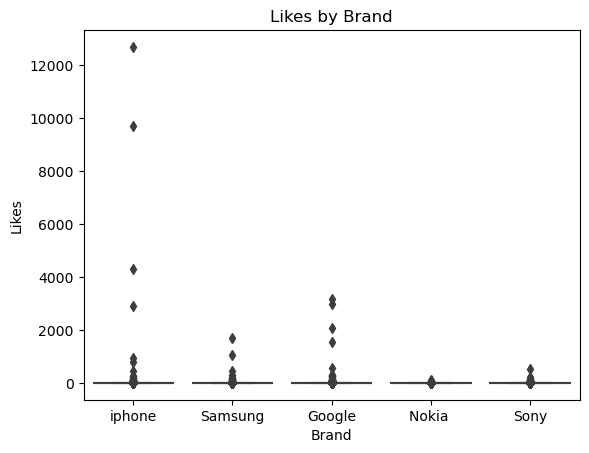

In [17]:
sns.boxplot(x='Brand', y='Likes', data=data_new)
plt.title('Likes by Brand')
plt.xlabel('Brand')
plt.ylabel('Likes')
plt.show()

## Count of Comments by Brand 

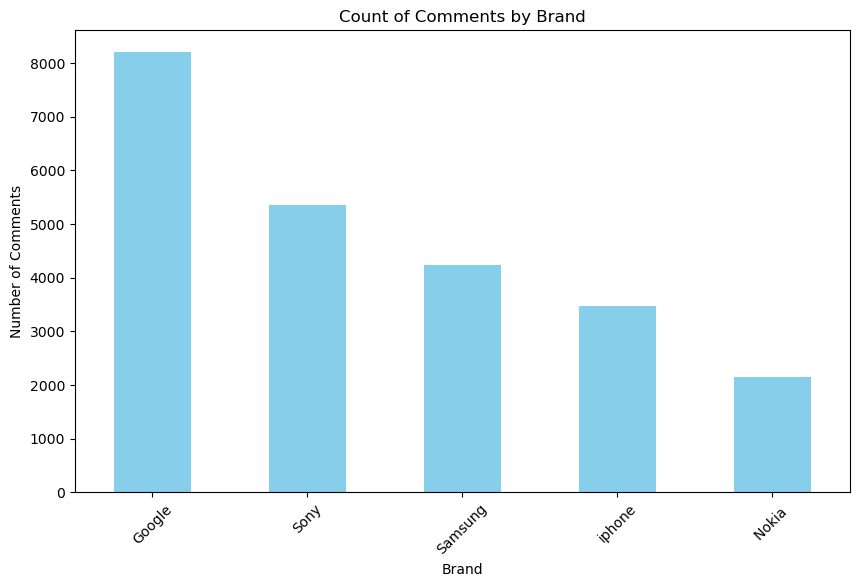

In [18]:
# Count of Comments by Brand
brand_counts = data_new['Brand'].value_counts()
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Comments by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

## Count of comments by Product 

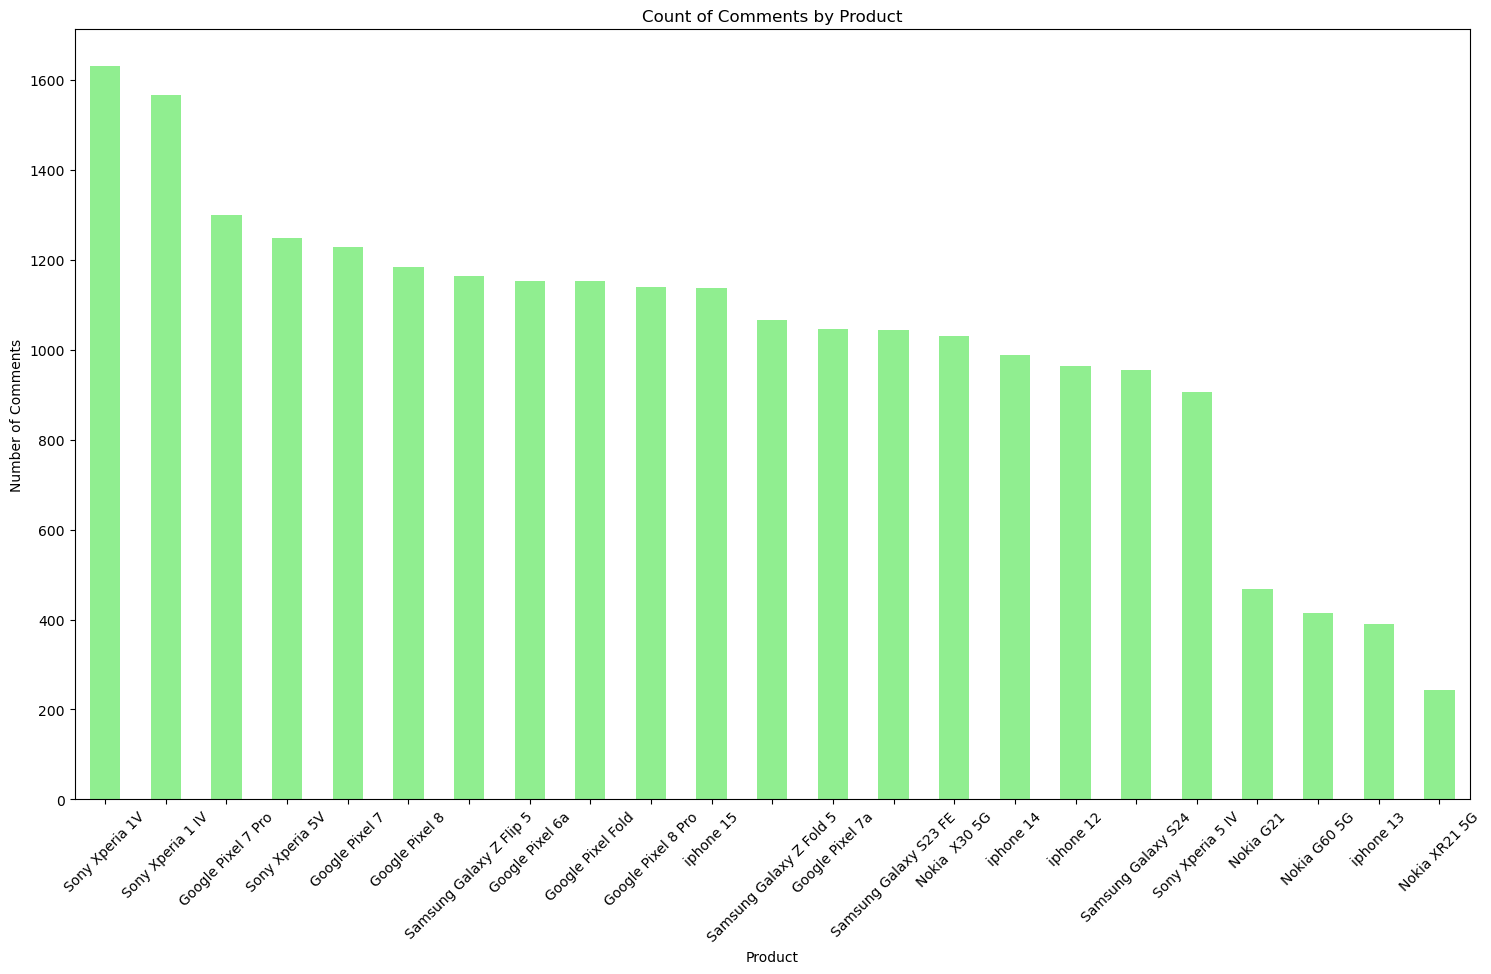

In [19]:
# Count of Comments by Product
product_counts = data_new['Product'].value_counts()
plt.figure(figsize=(18, 10))
product_counts.plot(kind='bar', color='lightgreen')
plt.title('Count of Comments by Product')
plt.xlabel('Product')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

## Engagement Metrics Comaprission by Brand  

<Figure size 1000x600 with 0 Axes>

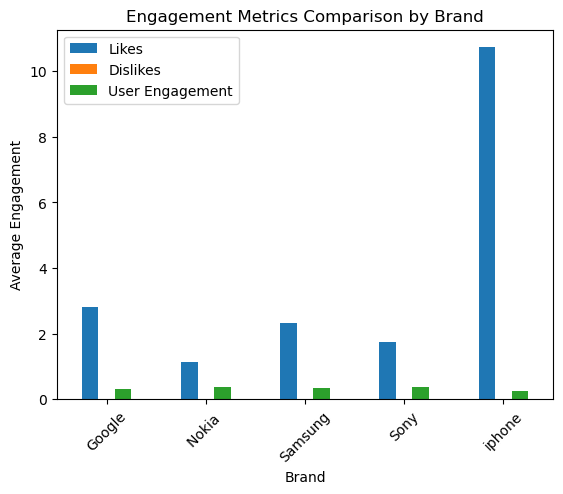

In [20]:
# Engagement Metrics Comparison
plt.figure(figsize=(10, 6))
data_new.groupby('Brand')[['Likes', 'Dislikes', 'User Engagement']].mean().plot(kind='bar')
plt.title('Engagement Metrics Comparison by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.show()

## User Engagement Analysis 

In [21]:
# User Engagement Analysis
top_users = data_new.groupby('Username').agg({'User Engagement': 'sum'}).sort_values(by='User Engagement', ascending=False).head(10)
print(top_users)


                  User Engagement
Username                         
techspurt                      47
mrwhosetheboss                 40
flossycarter                   25
karlconrad                     18
matthewmoniz                   15
peterharwood5705               14
mrhydro84                      13
gfourgadget                    13
nuyou21                        12
superiortoall22                11


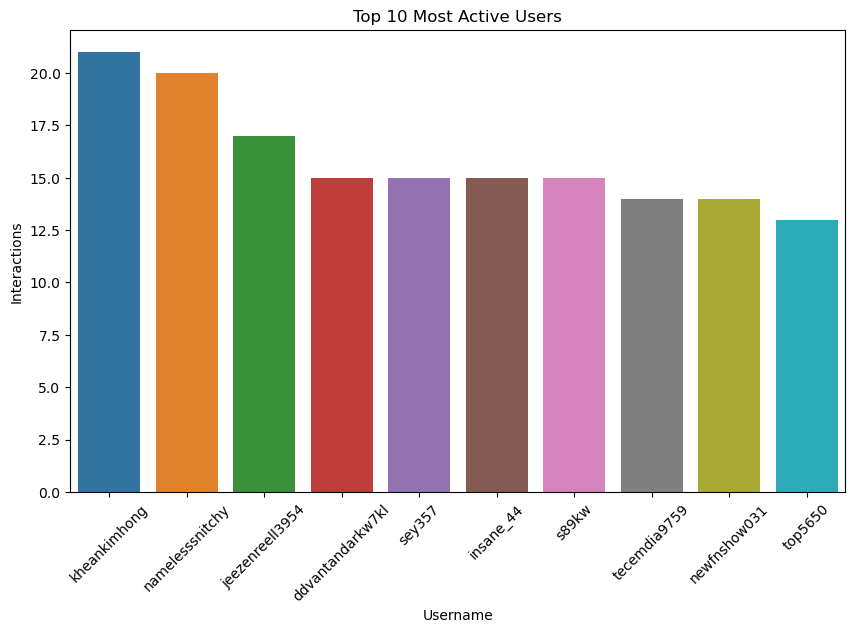

In [22]:
# User Interaction
user_interactions = data_new.groupby('Username')['Username'].count().reset_index(name='Interactions')
user_interactions = user_interactions.sort_values(by='Interactions', ascending=False).head(10)

# Visualize User Interaction
plt.figure(figsize=(10, 6))
sns.barplot(x='Username', y='Interactions', data=user_interactions)
plt.title('Top 10 Most Active Users')
plt.xlabel('Username')
plt.ylabel('Interactions')
plt.xticks(rotation=45)
plt.show()

## Word Cloud for Brands and Prodcuts

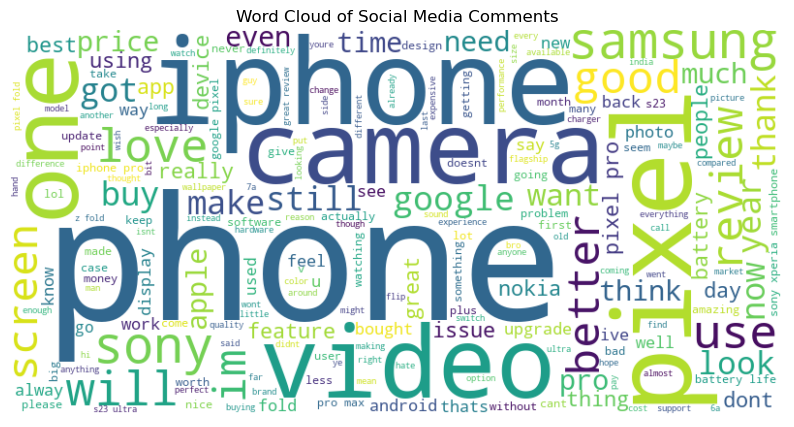

In [23]:
import numpy as np

# Convert float entries to strings in the 'Comment Text' column
data_new['Comment Text'] = data_new['Comment Text'].apply(lambda x: str(x) if not pd.isnull(x) else '')

# Join all comments into a single string
all_comments = ' '.join(data_new['Comment Text'])

# Word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Social Media Comments')
plt.axis('off')
plt.show()

plt.show()

## Word Frequency Analysis

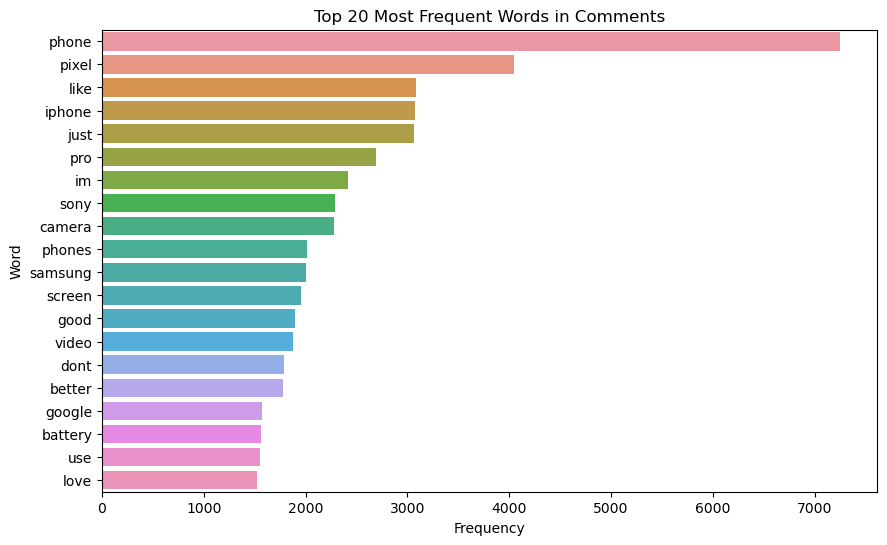

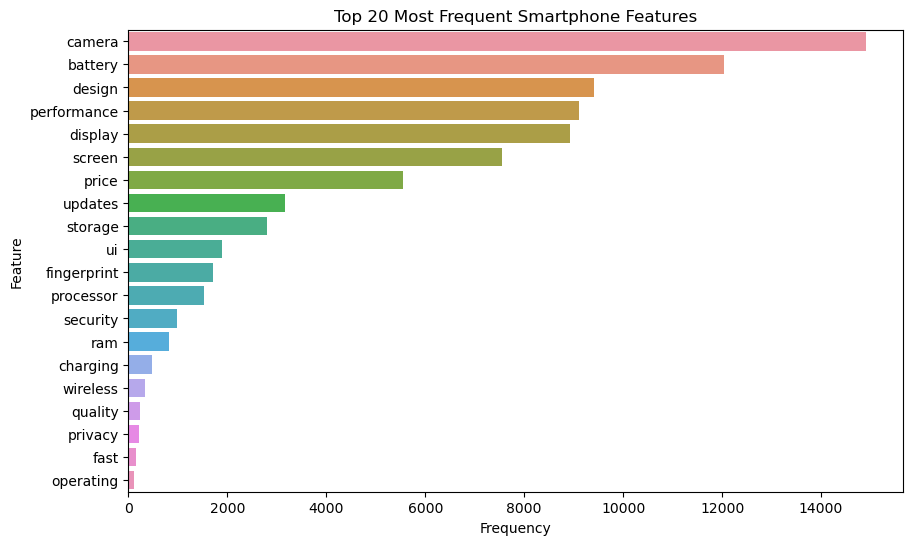

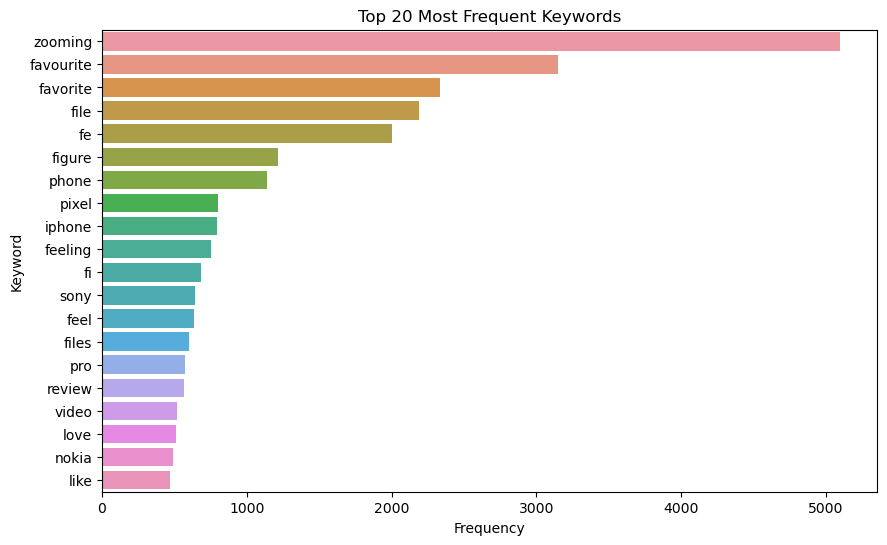

In [24]:
# Word Frequency Analysis
# Tokenize and count words
from sklearn.feature_extraction.text import CountVectorizer  # Import CountVectorizer from scikit-learn
word_vectorizer = CountVectorizer(stop_words='english', max_features=10000)
word_frequencies = word_vectorizer.fit_transform(data['Comment Text'])

# Get word frequencies
word_freq_df = pd.DataFrame({'Word': word_vectorizer.get_feature_names_out(),
                             'Frequency': word_frequencies.toarray().sum(axis=0)})
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot word frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df)
plt.title('Top 20 Most Frequent Words in Comments')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()



# Tokenize and count words in the 'Top Smartphone Features' column
word_vectorizer = CountVectorizer(stop_words='english', max_features=10000)
word_frequencies = word_vectorizer.fit_transform(data['Top Smartphone Features'].apply(lambda x: ' '.join(x)))

# Get word frequencies
word_freq_df = pd.DataFrame({'Feature': word_vectorizer.get_feature_names_out(),
                             'Frequency': word_frequencies.toarray().sum(axis=0)})

# Sort and select the top 20 most frequent features
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot word frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Feature', data=word_freq_df)
plt.title('Top 20 Most Frequent Smartphone Features')
plt.xlabel('Frequency')
plt.ylabel('Feature')
plt.show()

# Tokenize and count words in the 'Top Keywords' column
word_vectorizer = CountVectorizer(stop_words='english', max_features=10000)
word_frequencies = word_vectorizer.fit_transform(data['Top Keywords'].apply(lambda x: ' '.join(x)))

# Get word frequencies
word_freq_df = pd.DataFrame({'Keyword': word_vectorizer.get_feature_names_out(),
                             'Frequency': word_frequencies.toarray().sum(axis=0)})

# Sort and select the top 20 most frequent keywords
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot word frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=word_freq_df)
plt.title('Top 20 Most Frequent Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from ipywidgets import interact, Dropdown

# Assuming data_new is your DataFrame containing comments and information about brands and products

# Create brand and product dropdown widgets
brand_dropdown = Dropdown(options=data_new['Brand'].unique(), description='Brand:')
product_dropdown = Dropdown(options=[], description='Product:')

# Function to update product dropdown based on selected brand
def update_product_dropdown(brand):
    product_dropdown.options = data_new[data_new['Brand'] == brand]['Product'].unique()

# Function to update the plot based on selected brand, product, and column
def update_word_frequency_plot(brand, product, column):
    # Filter the data based on selected brand and product
    filtered_data = data_new[(data_new['Brand'] == brand) & (data_new['Product'] == product)]
    
    # Tokenize and count words
    word_vectorizer = CountVectorizer(stop_words='english', max_features=10000)
    
    if column == 'Comment Text':
        word_frequencies = word_vectorizer.fit_transform(filtered_data[column])
        title = f'Top 20 Most Frequent Words in Comments for {brand}: {product}'
    else:
        word_frequencies = word_vectorizer.fit_transform(filtered_data[column].apply(lambda x: ' '.join(x)))
        title = f'Top 20 Most Frequent Words in {column.capitalize()} for {brand}: {product}'
    
    # Get word frequencies
    word_freq_df = pd.DataFrame({'Word': word_vectorizer.get_feature_names_out(),
                                 'Frequency': word_frequencies.toarray().sum(axis=0)})
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

    # Plot word frequencies
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=word_freq_df)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

# Link the brand dropdown to the product dropdown
interact(update_product_dropdown, brand=brand_dropdown)

# Create dropdown for selecting column
column_dropdown = Dropdown(options=['Comment Text', 'Top Smartphone Features', 'Top Keywords'], description='Select Column:')

# Create interactive plot
interact(update_word_frequency_plot, brand=brand_dropdown, product=product_dropdown, column=column_dropdown)



interactive(children=(Dropdown(description='Brand:', options=('iphone', 'Samsung', 'Google', 'Nokia ', 'Sony')…

interactive(children=(Dropdown(description='Brand:', options=('iphone', 'Samsung', 'Google', 'Nokia ', 'Sony')…

<function __main__.update_word_frequency_plot(brand, product, column)>

## N-gram Analysis 

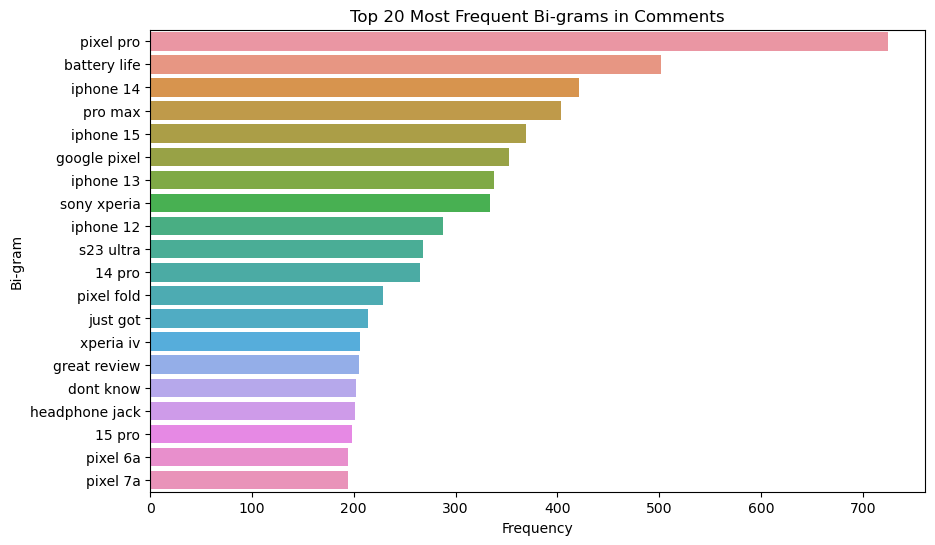

In [26]:
# N-gram Analysis
# Tokenize and count bi-grams
bi_gram_vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
bi_gram_frequencies = bi_gram_vectorizer.fit_transform(data['Comment Text'])

# Get bi-gram frequencies
bi_gram_freq_df = pd.DataFrame({'Bi-gram': bi_gram_vectorizer.get_feature_names_out(),
                                'Frequency': bi_gram_frequencies.toarray().sum(axis=0)})
bi_gram_freq_df = bi_gram_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot bi-gram frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bi-gram', data=bi_gram_freq_df)
plt.title('Top 20 Most Frequent Bi-grams in Comments')
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.show()

# Topic Modeling

In [27]:
from sklearn.decomposition import LatentDirichletAllocation  # Import LatentDirichletAllocation from scikit-learn

# Topic Modeling (LDA)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Assuming 5 topics
lda_model.fit(word_frequencies)

# Get the most probable words for each topic
topic_keywords = []
for topic_weights in lda_model.components_:
    top_keyword_locs = (-topic_weights).argsort()[:10]  # Top 10 keywords per topic
    topic_keywords.append([word_vectorizer.get_feature_names_out()[i] for i in top_keyword_locs])

# Print the top keywords for each topic
for i, keywords in enumerate(topic_keywords):
    print(f"Topic {i+1}: {', '.join(keywords)}")


Topic 1: like, father, sony, phone, screen, price, fold, looks, use, xperia
Topic 2: battery, pixel, samsung, google, xperia, ultra, s24, day, life, feedback
Topic 3: feature, feeling, dont, camera, phone, buy, feels, going, year, new
Topic 4: zooming, favourite, favorite, file, fe, figure, fi, files, feel, review
Topic 5: iphone, pro, 14, 13, 15, better, pixel, 12, plus, years



The topics extracted from the comments about smartphones using the LDA model are as follows:

Topic 1: Comparative Analysis of Brands

This topic appears to focus on comparisons between different smartphone brands such as Pixel, Samsung, and Google.
It includes terms like "s23," "pro," "fold," indicating discussions about specific models or features.
Words like "better" and "price" suggest comparisons of features and pricing between different brands or models.
Topic 2: iPhone Reviews and Discussions

This topic revolves around discussions related to iPhone models, particularly the Pro versions (e.g., iPhone 14 Pro, iPhone 15 Pro).
It includes terms like "review," "video," "just," indicating discussions about reviews and video content related to iPhones.
Numbers like "14," "15," "13," and "12" likely refer to different iPhone models.
Topic 3: General Smartphone Usage and Preferences

This topic encompasses general discussions about smartphone features and user preferences.
It includes terms like "screen," "battery," "camera," "phones," reflecting common features and aspects users consider when evaluating smartphones.
Words like "like," "dont," and "better" indicate expressions of preferences and opinions.
Topic 4: Sony Xperia Discussions

This topic seems to focus specifically on discussions related to Sony Xperia smartphones.
It includes terms like "sony," "xperia," "phones," suggesting discussions about Sony's Xperia series.
Words like "love" and "years" may indicate sentiments and longevity of usage regarding Sony Xperia devices.
Topic 5: Nokia Smartphone Features

This topic revolves around discussions related to Nokia smartphones, particularly their features and capabilities.
It includes terms like "video," "camera," "good," "nice," indicating discussions about the camera quality and overall features of Nokia phones.
Words like "jack," "sd," and "card" suggest discussions about hardware features like headphone jacks and SD card support.
These topics provide insights into the main themes and discussions present in the comments about smartphones, helping to identify common topics of interest and sentiment among users.

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming 'Processed Comment' is the column with text data
# Fill missing values with empty strings
data_new['Processed Comment'].fillna('', inplace=True)

# Vectorize the comments
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(data_new['Processed Comment'])

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(X)

# Visualize topics
def plot_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

# Get feature names from CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Display top words for each topic
n_top_words = 10
plot_top_words(lda_model, feature_names, n_top_words)



Topic #1: screen phone use im app apple apps google ive watch
Topic #2: phone jack sd card charging storage headphone charger ultra deal
Topic #3: fold pixel google samsung fe wallpaper s23 exynos 5g india
Topic #4: lol like god game thank review thanks mate real jesus
Topic #5: iphone pro pixel im 14 15 13 12 better phone
Topic #6: video review great like thanks nice good videos really phone
Topic #7: nokia love phone good dont like phones design x30 review
Topic #8: camera phone pixel photos mode video use like sensor quality
Topic #9: phone battery like samsung dont screen phones good pixel better
Topic #10: sony xperia phone phones years iv updates price software like



Based on the top words for each topic generated by Latent Dirichlet Allocation (LDA), we can interpret the following themes for each topic:

Topic #1: General Smartphone Use: This topic seems to cover general smartphone usage, including apps, Apple, Google, and usage-related terms like "watch" and "app".

Topic #2: Phone Hardware Features: This topic discusses various hardware features of phones such as headphone jacks, SD cards, charging, storage, and related terms.

Topic #3: Specific Phone Models and Brands: This topic appears to focus on specific phone models and brands like Pixel, Samsung, and Google, including terms like "fold", "fe" (presumably referring to Samsung Galaxy S20 FE), "exynos", and "India".

Topic #4: Expressions and Appreciation: This topic includes expressions like "lol", "like", "god", "thanks", and "mate", possibly indicating sentiments and expressions of appreciation.

Topic #5: Comparison between iPhone Models: This topic seems to discuss comparisons between different iPhone models, including terms like "iphone", "pro", "14", "15", "13", and "12".

Topic #6: Video Reviews: This topic revolves around video reviews, with terms like "video", "review", "great", "thanks", "nice", and "good".

Topic #7: Nokia Phones and Design: This topic seems to focus on Nokia phones, including terms like "nokia", "love", "phone", "good", and "design".

Topic #8: Camera Quality and Features: This topic discusses camera-related aspects of phones, including terms like "camera", "pixel", "photos", "mode", "video", and "quality".

Topic #9: Battery and Screen Quality: This topic discusses battery and screen-related aspects of phones, including terms like "battery", "samsung", "screen", "phones", "good", and "pixel".

Topic #10: Sony Xperia Phones and Updates: This topic revolves around Sony Xperia phones, including terms like "sony", "xperia", "phone", "phones", "years", "updates", "price", and "software".

These topics provide insights into the main themes present in the comments about smartphones. Each topic captures different aspects of smartphone usage, preferences, and opinions expressed by users.

In [29]:
data_new.head(10)

,Brand,Product,Comment Text,Username,Timestamp,Likes,Dislikes,User Engagement,Video Title,Video URL,Video Description,Processed Comment,Top Keywords,Top Smartphone Features,Positive Sentences CT,Negative Sentences CT
0,iphone,iphone 15,would you rather have a 14 pro or a 15 \nfor that iphone 15 battery test\n,mrwhosetheboss,2023-09-25 15:00:30,926,0,5,iPhone 15 / 15 Plus Review - Suspiciously Good!,https://www.youtube.com/watch?v=s1XVb4mdELc,"my apple iphone 15 / 15 plus review, including camera, battery, and more! for the latest iphone 15 cases from torras, including the magstand case, airbag case and magnetic case for your phone, go to amazon us with code 20whoseboss to get 20% off today! official website with code 20whoseboss: amazon uk with code 20whoseboss: #torras #ostandcase #airbag case #torrascase i spend a lot of time trying to make my videos as concise, polished and useful as possible for you - if you would like to support me on that mission then consider subscribing to the channel - you'd make my day :beaming_face_with_smiling_eyes: for my tech hot takes: for my personal posts: does anyone still use this anymore?: amazon affiliate links (if you buy anything through these it will support the channel and allow us to buy better gear!): amazon us: amazon uk: my filming gear: music is from epidemic sound:",would rather 14 pro 15 iphone 15 battery test,"['15', 'rather', 'test', '14', 'battery']","['battery', 'camera']",[],[]
1,iphone,iphone 15,as a vfx artist and supervisor i can confirm that what you say is true the ony factor in compression is the perspective that is created by the distance to the subject if you take a widangle shot from the same distance as your portrait how could there be parallax movement between foreground and background if you didnt change your position right\n\nif you move towards something the things farther away get smaller at a slower rate as the things closer to you so the background objects look smaller on an image in comparison to the foreground object than if youre further away,chloebanderas,2023-09-23 09:49:23,267,0,5,iPhone 15: A Photographer's Review,https://www.youtube.com/watch?v=19SyrljSDHQ,in-depth camera tests of the iphone 15 and iphone 15 pro by a professional download my luts for apple log motionvfx must have final cut presets my favourite source of songs + sfx and unlimited licenses capture one mobile blackmagic camera kondor blue ssd clamp instagram twitter 0:00 - intro 0:55 - iphone 15 cameras 2:47 - portrait & cinematic mode 4:18 - lenses 4:44 - iphone 15 pro 5:14 - action button 6:14 - processor 6:54 - usb-c 7:29 - capture one 9:29 - lenses 12:01 - action mode 12:41 - apple log 14:29 - usb-c,vfx artist supervisor confirm say true ony factor compression perspective created distance subject take widangle shot distance portrait could parallax movement foreground background didnt change position right move towards something things farther away get smaller slower rate things closer background objects look smaller image comparison foreground object youre away,"['background', 'away', 'smaller', 'things', 'position']","['processor', 'camera']",['as a vfx artist and supervisor i can confirm that what you say is true the ony factor in compression is the perspective that is created by the distance to the subject if you take a widangle shot from the same distance as your portrait how could there be parallax movement between foreground and background if you didnt change your position right\n\nif you move towards something the things farther away get smaller at a slower rate as the things closer to you so the background objects look smaller on an image in comparison to the foreground object than if youre further away'],[]
2,iphone,iphone 15,hey chaps is 60hz a deal breaker,thetechchap,2023-09-24 19:47:56,258,0,5,iPhone 15 / 15 Plus FULL REVIEW - Time to Upgrade!,https://www.youtube.com/watch?v=ImJOVva2mxo,should you upgrade to the iphone 15 or 15 plus - and how much better are the 15 pro

In [30]:
## User Behaviour Analysis

# Sentiment Analysis

In [31]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Read the data from the Excel file into a DataFrame
data_new = pd.read_excel('cleaned_smartphone_data.xlsx')

# Calculate sentiment score for each comment in the DataFrame
data_new['Sentiment Score'] = data_new['Comment Text'].apply(lambda comment: sia.polarity_scores(str(comment))['compound'])

# Assign sentiment labels based on the sentiment scores
data_new['Sentiment Label'] = data_new['Sentiment Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

# Optionally, save the DataFrame with sentiment analysis results to a new Excel file
data_new.to_excel('smartphone_data_sentiment_analysis.xlsx', index=False)

print("Sentiment analysis completed and results saved to 'smartphone_data_sentiment_analysis.xlsx'.")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\atiya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment analysis completed and results saved to 'smartphone_data_sentiment_analysis.xlsx'.


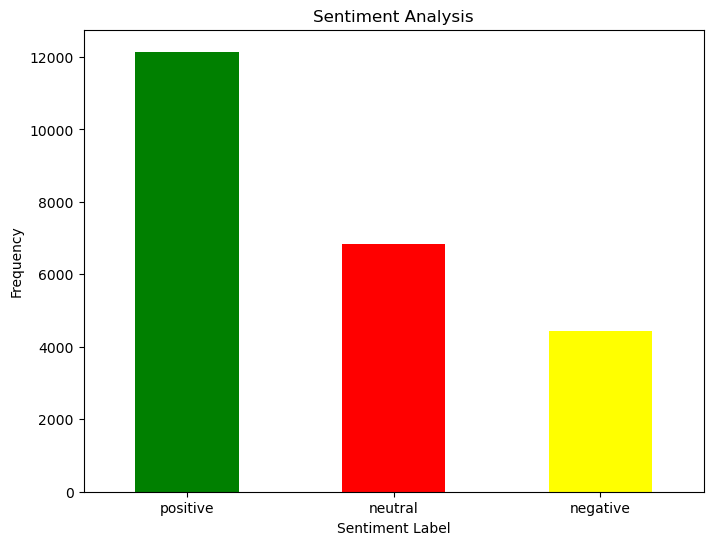

In [32]:

# Read the Excel file with sentiment analysis results
sentiment_analysis_results = pd.read_excel('smartphone_data_sentiment_analysis.xlsx', sheet_name=None)

# Iterate through each sheet
for sheet_name, df in sentiment_analysis_results.items():
    # Aggregate sentiment labels for the current sheet
    sentiment_distribution = df['Sentiment Label'].value_counts()

    # Plotting
    plt.figure(figsize=(8, 6))
    sentiment_distribution.plot(kind='bar', color=['green', 'red', 'yellow'])
    plt.title(f'Sentiment Analysis')
    plt.xlabel('Sentiment Label')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.show()


<Figure size 800x600 with 0 Axes>

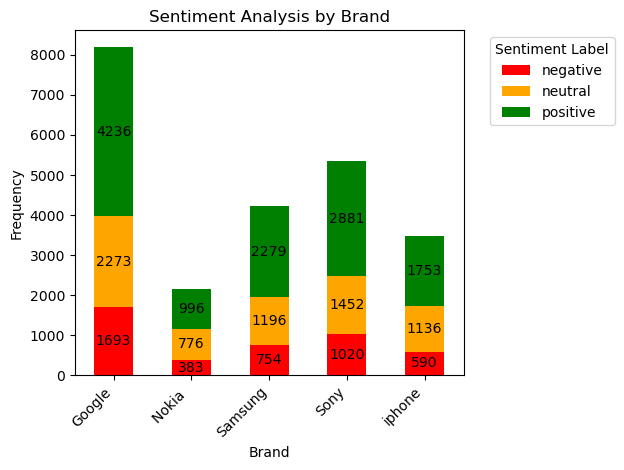

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file with sentiment analysis results
try:
    sentiment_analysis_results = pd.read_excel('smartphone_data_sentiment_analysis.xlsx', sheet_name=None)
except FileNotFoundError:
    print("Error: File 'smartphone_data_sentiment_analysis.xlsx' not found.")
    exit()

# Iterate through each sheet
for sheet_name, df in sentiment_analysis_results.items():
    # Extract brand name from sheet name
    brand_name = sheet_name.split('_')[0]  # Assuming brand name is before the underscore in sheet name

    # Check if 'Brand' column exists in the DataFrame
    if 'Brand' not in df.columns:
        print(f"Error: 'Brand' column not found in sheet '{sheet_name}'. Skipping.")
        continue

    # Group by brand and sentiment label, then count occurrences
    sentiment_distribution = df.groupby(['Brand', 'Sentiment Label']).size().unstack(fill_value=0)

    # Plotting
    plt.figure(figsize=(8, 6))
    ax = sentiment_distribution.plot(kind='bar', stacked=True, color=['red', 'orange', 'green'])
    plt.title(f'Sentiment Analysis by Brand')
    plt.xlabel('Brand')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Sentiment Label', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add labels to the bars
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate(f'{height:.0f}', xy=(left + width / 2, bottom + height / 2), ha='center', va='center')

    plt.tight_layout()
    plt.show()


In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, Dropdown

# Separate positive and negative comments based on sentiment
positive_comments = data_new[data_new['Sentiment Label'] == 'positive']['Processed Comment']
negative_comments = data_new[data_new['Sentiment Label'] == 'negative']['Processed Comment']

# Function to generate word cloud
def generate_wordcloud(comments, title):
    # Convert comments to strings and handle missing values
    comments = comments.astype(str).fillna('')
    
    # Concatenate all comments into a single string
    text = ' '.join(comments)
    
    # Generate the word cloud if there are comments
    if text:
        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Display the word cloud
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print("No comments found for the selected options. Please select different options.")

# Dropdown options
sentiment_options = ['All', 'positive', 'negative']
brand_options = ['All'] + data_new['Brand'].unique().tolist()
product_options = ['All'] + data_new['Product'].unique().tolist()

# Dropdown widgets
sentiment_dropdown = Dropdown(options=sentiment_options, description='Sentiment:')
brand_dropdown = Dropdown(options=brand_options, description='Brand:')
product_dropdown = Dropdown(options=product_options, description='Product:')

# Function to update word cloud based on dropdown selection
def update_wordcloud(sentiment, brand, product):
    if sentiment == 'All':
        if brand == 'All' and product == 'All':
            comments = data_new['Processed Comment']
        elif brand != 'All' and product == 'All':
            comments = data_new[data_new['Brand'] == brand]['Processed Comment']
        elif brand == 'All' and product != 'All':
            comments = data_new[data_new['Product'] == product]['Processed Comment']
        else:
            comments = data_new[(data_new['Brand'] == brand) & (data_new['Product'] == product)]['Processed Comment']
    elif sentiment == 'positive':
        if brand == 'All' and product == 'All':
            comments = positive_comments
        elif brand != 'All' and product == 'All':
            comments = data_new[(data_new['Sentiment Label'] == sentiment) & (data_new['Brand'] == brand)]['Processed Comment']
        elif brand == 'All' and product != 'All':
            comments = data_new[(data_new['Sentiment Label'] == sentiment) & (data_new['Product'] == product)]['Processed Comment']
        else:
            comments = data_new[(data_new['Sentiment Label'] == sentiment) & 
                                (data_new['Brand'] == brand) & (data_new['Product'] == product)]['Processed Comment']
    else:
        if brand == 'All' and product == 'All':
            comments = negative_comments
        elif brand != 'All' and product == 'All':
            comments = data_new[(data_new['Sentiment Label'] == sentiment) & (data_new['Brand'] == brand)]['Processed Comment']
        elif brand == 'All' and product != 'All':
            comments = data_new[(data_new['Sentiment Label'] == sentiment) & (data_new['Product'] == product)]['Processed Comment']
        else:
            comments = data_new[(data_new['Sentiment Label'] == sentiment) & 
                                (data_new['Brand'] == brand) & (data_new['Product'] == product)]['Processed Comment']
    
    if sentiment == 'All':
        sentiment_label = ''
    else:
        sentiment_label = sentiment.capitalize()
    
    if brand == 'All':
        brand_label = ''
    else:
        brand_label = brand
    
    if product == 'All':
        product_label = ''
    else:
        product_label = product
    
    title = f'Word Cloud of {sentiment_label} Comments'
    if brand_label and product_label:
        title += f' for {brand_label} {product_label}'
    elif brand_label:
        title += f' for {brand_label}'
    elif product_label:
        title += f' for {product_label}'
    
    # Check if there is any data for the selected brand and product
    if brand != 'All' and product != 'All':
        filtered_data = data_new[(data_new['Brand'] == brand) & (data_new['Product'] == product)]
        if filtered_data.empty:
            print(f"The product '{product}' does not match with the brand '{brand}'. Please select a different combination.")
            return
    
    generate_wordcloud(comments, title)

# Interact function to link dropdowns with update function
interact(update_wordcloud, sentiment=sentiment_dropdown, brand=brand_dropdown, product=product_dropdown)


interactive(children=(Dropdown(description='Sentiment:', options=('All', 'positive', 'negative'), value='All')…

<function __main__.update_wordcloud(sentiment, brand, product)>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, Dropdown
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, Dropdown

# Define the function to update the pie chart
def update_pie_chart(brand, product):
    # Filter data based on selected brand and product
    filtered_data = data_new.copy()
    if brand != 'All':
        filtered_data = filtered_data[filtered_data['Brand'] == brand]
    if product != 'All':
        filtered_data = filtered_data[filtered_data['Product'] == product]
    
    # Check if there is any data for the selected brand and product
    if filtered_data.empty:
        print(f"No data available for the selected combination: Brand - {brand}, Product - {product}. Please select a different combination.")
        return
    
    # Group by sentiment label and count occurrences
    sentiment_distribution = filtered_data['Sentiment Label'].value_counts(normalize=True)

    # Define colors based on sentiment
    colors = {'positive': 'green', 'neutral': 'orange', 'negative': 'red'}

    # Plotting the pie chart
    plt.figure(figsize=(8, 6))
    sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10, 7), colors=[colors.get(x, 'gray') for x in sentiment_distribution.index])
    plt.title(f'Sentiment Analysis for {brand} {product}')
    plt.ylabel('')  # Remove the y-label
    plt.show()

# Dropdown options
brand_options = ['All'] + data_new['Brand'].unique().tolist()
product_options = ['All'] + data_new['Product'].unique().tolist()

# Dropdown widgets
brand_dropdown = Dropdown(options=brand_options, description='Brand:')
product_dropdown = Dropdown(options=product_options, description='Product:')

# Interact function to link dropdowns with update function
interact(update_pie_chart, brand=brand_dropdown, product=product_dropdown)

interactive(children=(Dropdown(description='Brand:', options=('All', 'iphone', 'Samsung', 'Google', 'Nokia ', …

<function __main__.update_pie_chart(brand, product)>

In [36]:
data_new.head()

,Brand,Product,Comment Text,Username,Timestamp,Likes,Dislikes,User Engagement,Video Title,Video URL,Video Description,Processed Comment,Top Keywords,Top Smartphone Features,Positive Sentences CT,Negative Sentences CT,Sentiment Score,Sentiment Label
0,iphone,iphone 15,would you rather have a 14 pro or a 15 \nfor that iphone 15 battery test\n,mrwhosetheboss,2023-09-25 15:00:30,926,0,5,iPhone 15 / 15 Plus Review - Suspiciously Good!,https://www.youtube.com/watch?v=s1XVb4mdELc,"my apple iphone 15 / 15 plus review, including camera, battery, and more! for the latest iphone 15 cases from torras, including the magstand case, airbag case and magnetic case for your phone, go to amazon us with code 20whoseboss to get 20% off today! official website with code 20whoseboss: amazon uk with code 20whoseboss: #torras #ostandcase #airbag case #torrascase i spend a lot of time trying to make my videos as concise, polished and useful as possible for you - if you would like to support me on that mission then consider subscribing to the channel - you'd make my day :beaming_face_with_smiling_eyes: for my tech hot takes: for my personal posts: does anyone still use this anymore?: amazon affiliate links (if you buy anything through these it will support the channel and allow us to buy better gear!): amazon us: amazon uk: my filming gear: music is from epidemic sound:",would rather 14 pro 15 iphone 15 battery test,"['15', 'rather', 'test', '14', 'battery']","['battery', 'camera']",[],[],0.0000,neutral
1,iphone,iphone 15,as a vfx artist and supervisor i can confirm that what you say is true the ony factor in compression is the perspective that is created by the distance to the subject if you take a widangle shot from the same distance as your portrait how could there be parallax movement between foreground and background if you didnt change your position right\n\nif you move towards something the things farther away get smaller at a slower rate as the things closer to you so the background objects look smaller on an image in comparison to the foreground object than if youre further away,chloebanderas,2023-09-23 09:49:23,267,0,5,iPhone 15: A Photographer's Review,https://www.youtube.com/watch?v=19SyrljSDHQ,in-depth camera tests of the iphone 15 and iphone 15 pro by a professional download my luts for apple log motionvfx must have final cut presets my favourite source of songs + sfx and unlimited licenses capture one mobile blackmagic camera kondor blue ssd clamp instagram twitter 0:00 - intro 0:55 - iphone 15 cameras 2:47 - portrait & cinematic mode 4:18 - lenses 4:44 - iphone 15 pro 5:14 - action button 6:14 - processor 6:54 - usb-c 7:29 - capture one 9:29 - lenses 12:01 - action mode 12:41 - apple log 14:29 - usb-c,vfx artist supervisor confirm say true ony factor compression perspective created distance subject take widangle shot distance portrait could parallax movement foreground background didnt change position right move towards something things farther away get smaller slower rate things closer background objects look smaller image comparison foreground object youre away,"['background', 'away', 'smaller', 'things', 'position']","['processor', 'camera']",['as a vfx artist and supervisor i can confirm that what you say is true the ony factor in compression is the perspective that is created by the distance to the subject if you take a widangle shot from the same distance as your portrait how could there be parallax movement between foreground and background if you didnt change your position right\n\nif you move towards something the things farther away get smaller at a slower rate as the things closer to you so the background objects look smaller on an image in comparison to the foreground object than if youre further away'],[],0.5859,positive
2,iphone,iphone 15,hey chaps is 60hz a deal breaker,thetechchap,2023-09-24 19:47:56,258,0,5,iPhone 15 / 15 Plus FULL REVIEW - Time to Upgrade!,https://www.youtube.com/watch?v=ImJOVva2mxo,should you upgrade t

#  Machine Learning (SVM): A Text Classification Approach

## Splitting data into input variables and target variable

In [55]:
# Split data into features (X) and target (y)
X = data_new['Comment Text']
y = data_new['Sentiment Label']

## Splitting data into train and test set

In [56]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Replace missing values with empty strings
X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)

In [57]:
import pandas as pd
import joblib
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load your dataset and preprocess it as needed
# Assuming you have already loaded and preprocessed your data
# X should contain your features (comment text) and y should contain your target labels (sentiment)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Replace missing values with empty strings
X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)

# Define pipeline components
tfidf_vectorizer = TfidfVectorizer()
bow_vectorizer = CountVectorizer()
svm_classifier = SVC(kernel='linear', C=1.0, class_weight='balanced')
logistic_classifier = LogisticRegression()
naive_bayes_classifier = MultinomialNB()
sgd_classifier = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=100, tol=None)

# Create pipelines
svm_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', svm_classifier)
])

logistic_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', logistic_classifier)
])

naive_bayes_pipeline = Pipeline([
    ('bow', bow_vectorizer),
    ('classifier', naive_bayes_classifier)
])

sgd_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', sgd_classifier)
])

# Train and evaluate models using pipelines
pipelines = {
    'SVM': svm_pipeline,
    'Logistic Regression': logistic_pipeline,
    'Naive Bayes': naive_bayes_pipeline,
    'SGD Classifier': sgd_pipeline
}

# Train and save models
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy:", accuracy)
    print(f"\nClassification Report ({name}):\n", classification_report(y_test, y_pred))
    print(f"\nConfusion Matrix ({name}):\n", confusion_matrix(y_test, y_pred))
    
    # Save the model
    filename = f"{name.lower().replace(' ', '_')}_text_sentiment.pkl"
    with open(filename, "wb") as pipeline_file:
        joblib.dump(pipeline, pipeline_file)

# Access the trained models from the pipelines dictionary
for name, _ in pipelines.items():
    # Load the saved model
    filename = f"{name.lower().replace(' ', '_')}_text_sentiment.pkl"
    loaded_pipeline = joblib.load(filename)

    # Use the loaded model for prediction or evaluation
    y_pred = loaded_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy (loaded model):", accuracy)
    print(f"\nClassification Report ({name} - loaded model):\n", classification_report(y_test, y_pred))
    print(f"\nConfusion Matrix ({name} - loaded model):\n", confusion_matrix(y_test, y_pred))




SVM Accuracy: 0.8454312553373186

Classification Report (SVM):
               precision    recall  f1-score   support

    negative       0.66      0.75      0.70       855
     neutral       0.83      0.92      0.87      1361
    positive       0.94      0.84      0.89      2468

    accuracy                           0.85      4684
   macro avg       0.81      0.84      0.82      4684
weighted avg       0.86      0.85      0.85      4684


Confusion Matrix (SVM):
 [[ 643  114   98]
 [  85 1247   29]
 [ 249  149 2070]]


C:\Users\atiya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.838599487617421

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

    negative       0.80      0.54      0.64       855
     neutral       0.80      0.88      0.84      1361
    positive       0.87      0.92      0.89      2468

    accuracy                           0.84      4684
   macro avg       0.82      0.78      0.79      4684
weighted avg       0.84      0.84      0.83      4684


Confusion Matrix (Logistic Regression):
 [[ 463  167  225]
 [  41 1197  123]
 [  77  123 2268]]

Naive Bayes Accuracy: 0.6406917164816396

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

    negative       0.71      0.33      0.45       855
     neutral       0.83      0.26      0.39      1361
    positive       0.61      0.96      0.75      2468

    accuracy                           0.64      4684
   macro avg       0.72      0.52      0.53      4684
weighted avg       

In [61]:
import pandas as pd
import joblib
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVR  # Import SVR for Support Vector Regression
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = data_new['Comment Text']
y = data_new['Sentiment Score']

In [62]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Replace missing values with empty strings
X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)

In [64]:

# Define pipeline components
tfidf_vectorizer = TfidfVectorizer()
bow_vectorizer = CountVectorizer()
svm_regressor = SVR(kernel='linear', C=1.0)
linear_regressor = LinearRegression()
sgd_regressor = SGDRegressor(loss='squared_error', penalty='l2', alpha=1e-3, random_state=42, max_iter=100, tol=None)

# Create pipelines
svm_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('regressor', svm_regressor)
])

linear_regression_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('regressor', linear_regressor)
])

sgd_regression_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('regressor', sgd_regressor)
])

# Train and evaluate models using pipelines
pipelines = {
    'SVR': svm_pipeline,
    'Linear Regression': linear_regression_pipeline,
    'SGD Regressor': sgd_regression_pipeline
}

# Train and save models
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\n{name} MSE:", mse)
    
    # Save the model
    filename = f"{name.lower().replace(' ', '_')}_text_sentiment_regression_model.pkl"
    with open(filename, "wb") as pipeline_file:
        joblib.dump(pipeline, pipeline_file)

# Access the trained models from the pipelines dictionary
for name, _ in pipelines.items():
    # Load the saved model
    filename = f"{name.lower().replace(' ', '_')}_text_sentiment_regression_model.pkl"
    loaded_pipeline = joblib.load(filename)

    # Use the loaded model for prediction or evaluation
    y_pred = loaded_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\n{name} MSE (loaded model):", mse)


SVR MSE: 0.07114136897312232

Linear Regression MSE: 0.30858031265103447

SGD Regressor MSE: 0.11996233763758296

SVR MSE (loaded model): 0.07114136897312232

Linear Regression MSE (loaded model): 0.30858031265103447

SGD Regressor MSE (loaded model): 0.11996233763758296
